In [1]:
import pandas as pd
import psycopg2 as ps

In [2]:
def connect_to_db(host_name, dbname, port, username, password):
    try:
        conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)

    except ps.OperationalError as e:
        raise e
    else:
        print('Connected!')
    return conn

In [3]:
host_name = 'XXXXXXXXXXX'
dbname = 'XXXXXX'
port = '5432'
username = 'XXXXXXX'
password = 'XXXXXXX'
conn = None

conn = connect_to_db(host_name, dbname, port, username, password)

Connected!


In [18]:
#create a table

def create_table(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS videos (
                    video_id VARCHAR(255) PRIMARY KEY,
                    video_title TEXT NOT NULL,
                    upload_date DATE NOT NULL DEFAULT CURRENT_DATE,
                    view_count INTEGER NOT NULL,
                    like_count INTEGER NOT NULL,
                    dislike_count INTEGER NOT NULL,
                    comment_count INTEGER NOT NULL);""")
    
    curr.execute(create_table_command)

def check_if_video_exists(curr, video_id):
    query = ("""SELECT video_id FROM VIDEOS WHERE video_id=%s""")
    curr.execute(query, (video_id,))
    
    return curr.fetchone() is not None #it will return the row

In [12]:
create_table(curr)

In [17]:

def update_db(curr,df):
    tmp_df = pd.DataFrame(columns=["video_id","video_title","upload_date","view_count","like_count","dislike_count","comment_count"])

    for i, row in df.iterrows():
        if check_if_video_exists(curr, row['video_id']):
            update_row(curr, row['video_id'], row['video_title'], row['view_count'], row['like_count'], row['dislike_count'], row['comment_count'])
        else:
            tmp_df = tmp_df.append(row)
            
    return(tmp_df)

In [19]:
#update row if video exists

def update_row(curr, video_id, video_title, view_count, like_count, dislike_count, comment_count):
    query = ("""UPDATE videos
            SET video_title = %s,
                view_count = %s,
                like_count = %s,
                dislike_count = %s,
                comment_count = %s
            WHERE video_id = %s;""")
    vars_to_update = (video_title, view_count, like_count, dislike_count, comment_count)
    curr.execute(query, vars_to_update)

In [40]:
#writing insert command
def insert_into_table(curr, video_id, video_title, upload_date, view_count, like_count, dislike_count, comment_count):
    insert_into_videos = ("""INSERT INTO videos (video_id, video_title, upload_date, view_count, like_count, 
                                                dislike_count, comment_count)
                             VALUES (%s,%s,%s,%s,%s,%s,%s);""")
    row_to_insert = (video_id, video_title, upload_date, view_count, like_count, dislike_count, comment_count)

    curr.execute(insert_into_videos, row_to_insert)

In [39]:
#using a for loop to avoid performance and memory issues
def append_from_df_to_db(curr, df):
    for i, row in df.iterrows():
        insert_into_table(curr, row['video_id'], row['video_title'], row['upload_date'], row['view_count'], row['like_count'], row['dislike_count'], row['comment_count'])

In [9]:
df = pd.read_csv("youtube_vids_1st_pull.csv", index_col=0)
df.head(5)

,video_id,video_title,upload_date,view_count,like_count,dislike_count,comment_count
0,Zn2ZDUFdRmA,Week 12 Game Picks! | GameDay View,2021-11-26,67286,1316,74,197
1,fP9kNVJpNuQ,Week 12 Preview for EVERY Game | Around the NFL,2021-11-26,37840,712,40,45
2,xD4lNNLvrdk,Week 12 NFL Game Picks Win Probability | NFL ...,2021-11-26,54178,1240,62,294
3,4XVXl3R2m7c,Cam Jordan Crescent City Corps Bringing Chang...,2021-11-26,3762,87,37,28
4,dytzX391nFQ,Say Their Stories: Eddie Jackson Aids and Insp...,2021-11-26,4598,139,18,43


In [20]:
#curr command to allow SQL queries 
curr = conn.cursor()

In [30]:
new_vid_dif = update_db(curr, df)

In [22]:
conn.commit()

In [38]:
#Since table is not yet inserted into db, this variable should be the whole original df (else part)
new_vid_dif

,video_id,video_title,upload_date,view_count,like_count,dislike_count,comment_count
0,Zn2ZDUFdRmA,Week 12 Game Picks! | GameDay View,2021-11-26,67286,1316,74,197
1,fP9kNVJpNuQ,Week 12 Preview for EVERY Game | Around the NFL,2021-11-26,37840,712,40,45
2,xD4lNNLvrdk,Week 12 NFL Game Picks Win Probability | NFL ...,2021-11-26,54178,1240,62,294
3,4XVXl3R2m7c,Cam Jordan Crescent City Corps Bringing Chang...,2021-11-26,3762,87,37,28
4,dytzX391nFQ,Say Their Stories: Eddie Jackson Aids and Insp...,2021-11-26,4598,139,18,43
5,O6-na2b4RYU,Bills vs. Saints Week 12 Highlights | NFL 2021,2021-11-26,1200945,11202,370,1725
6,PJYRi1e2xDM,Knox is Feasting on Touchdowns Tonight!,2021-11-26,41871,409,23,88
7,IHWV19-UC1E,Saints Defense Has Room for Seconds!,2021-11-26,43410,439,16,72
8,L1xhFfxsCWk,When it&#39;s Turkey Bowl Your Buddy Swears H...,2021-11-26,48476,524,17,76
9,h5e-V338GLo,Every Hunter Renfrow Catch from 134-Yd Game vs...,2021-11-26,20907,411,7,101


In [27]:
host_name = 'XXXXXXXXXXXXX'
dbname = 'XXXXXXXXXXX'
port = 'XXXXXXXXXXX'
username = 'XXXXXXXXX'
password = 'XXXXXXX'
conn = None

conn = connect_to_db(host_name, dbname, port, username, password)

Connected!


In [36]:
curr = conn.cursor()

In [41]:
append_from_df_to_db(curr, new_vid_dif)

In [42]:
conn.commit()

## AWS database after first upload
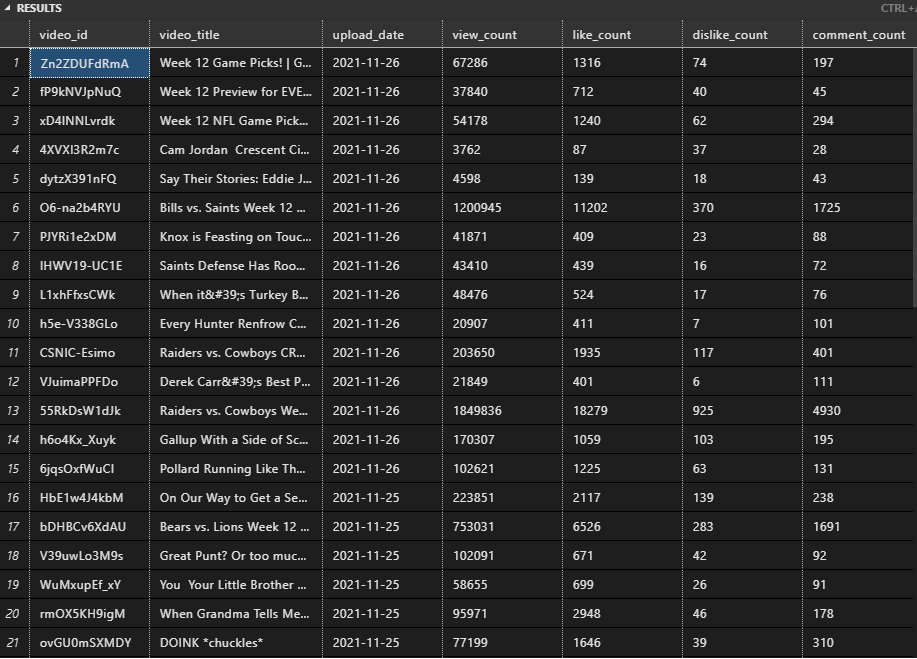

In [43]:
#Testing
df = pd.read_csv("youtube_vids_2nd_pull.csv", index_col=0)
df.head(5)

,video_id,video_title,upload_date,view_count,like_count,dislike_count,comment_count
0,FXT-vBu_mbA,Should the Browns Sit Baker Mayfield? | Good M...,2021-11-29,1674,64,4,36
1,8U5jqnKV5B8,Top 10 Plays from Sunday Week 12 | NFL 2021 Hi...,2021-11-29,31893,767,15,87
2,04noGdA6Ib0,Browns vs. Ravens LIVE Scoreboard! Join the Co...,2021-11-29,40481,370,42,14
3,fR90NwL87oY,Browns vs. Ravens Week 12 Highlights | NFL 2021,2021-11-29,679182,9246,333,1999
4,cvmr-OcCT3A,Every Interception from Sunday Week 12 | NFL 2...,2021-11-29,15666,353,4,79


In [44]:
curr = conn.cursor()

In [45]:
new_vid_dif2 = update_db(curr, df)

In [46]:
append_from_df_to_db(curr, new_vid_dif2)

In [47]:
conn.commit()

## AWS database after second update
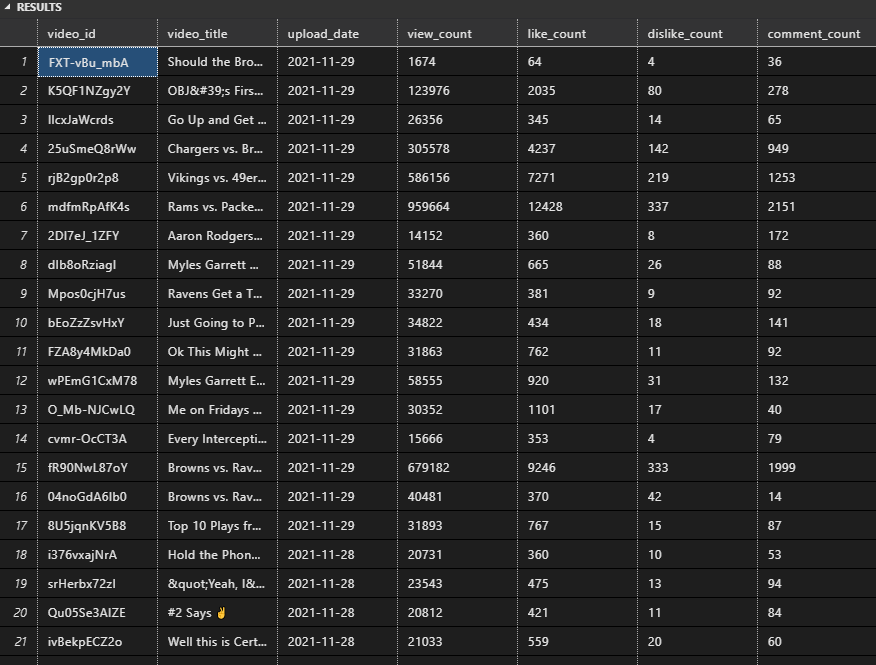

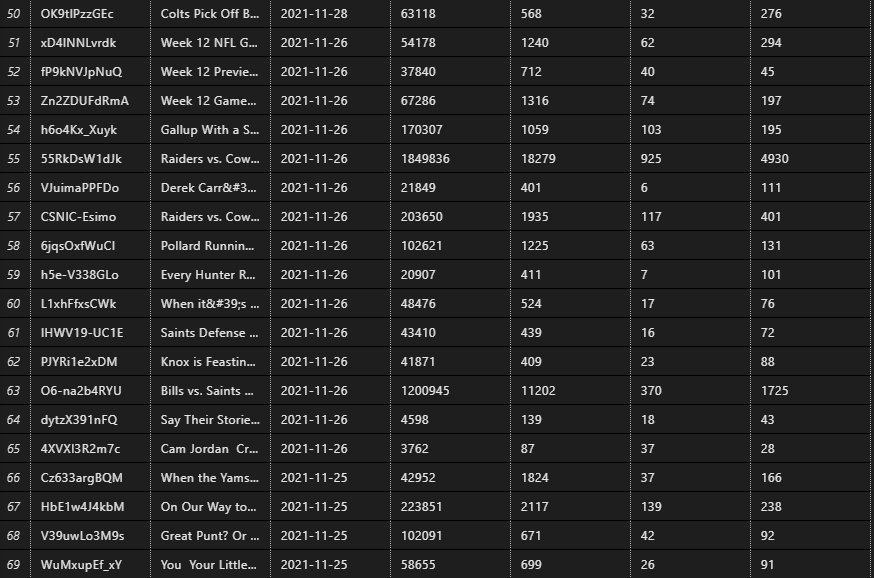

In [48]:
aws_db = pd.read_csv("AWS db.csv", index_col=0)
aws_db

,video_title,upload_date,view_count,like_count,dislike_count,comment_count
video_id,,,,,,
FXT-vBu_mbA,Should the Browns Sit Baker Mayfield? | Good M...,2021-11-29,1674,64,4,36
K5QF1NZgy2Y,OBJ&#39;s First Touchdown as a Ram,2021-11-29,123976,2035,80,278
IlcxJaWcrds,Go Up and Get It!,2021-11-29,26356,345,14,65
25uSmeQ8rWw,Chargers vs. Broncos Week 12 Highlights | NFL ...,2021-11-29,305578,4237,142,949
rjB2gp0r2p8,Vikings vs. 49ers Week 12 Highlights | NFL 2021,2021-11-29,586156,7271,219,1253
...,...,...,...,...,...,...
PaMkZIoc738,Best Of Manning Bros on MNF Week 11,2021-11-23,120128,1604,31,139
TfkkPLBlu7k,Top 15 Plays of Week 11 | NFL 2021 Highlights,2021-11-23,43516,677,13,70
EFyDbgm1qtA,Peyton Eli are Genuinely Confused,2021-11-23,60718,1008,18,102
